In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.backend as K
import pandas as pd
import numpy as np
import vertica_python
import joblib
import datetime
from sklearn.preprocessing import StandardScaler
import calendar
import warnings
import matplotlib.pyplot as plt
from datetime import timedelta
warnings.filterwarnings("ignore")

2022-07-19 16:16:01.026053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-19 16:16:01.026118: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# col_names = ["suborder_code", "courier_group", "ds", "dc", "dp", "os", "oc", 
#              "op", "seller", "O2S", "S2A", "O2A", "seller_o2s_15", 
#              "seller_o2s_30", "cg_oc_dc_o2a_7", "cg_oc_dp_o2a_7", "cg_oc_ds_o2a_7", 
#              "oc_dc_o2a_7", "oc_dp_o2a_7", "oc_ds_o2a_7", "cg_dc_o2a_7", "cg_dp_o2a_7", "cg_ds_o2a_7",
#              "order_created_time", "dc_o2a_7", "ds_o2a_7", "os_ds_o2a_7", "cg_os_ds_o2a_7", 
#              "cg_oc_ds_breach_7", "cg_oc_dc_breach_7", "cg_dc_breach_7", "cg_ds_breach_7", 
#              "oc_ds_breach_7", "oc_dc_breach_7", "oc_dc_att_count_7", "dc_att_count_7","PDD1","PDD2"]

# select_vars = ','.join(col_names)

# conn_info = dict(host='10.65.0.201', port=5433, database='snapdealdwh', user='datascience',password='D@t@$c!#9786')

# conn = vertica_python.connect(**conn_info)
# cur = conn.cursor()
# query_fetch = "select %s from analytics_logistics.pdd2_data_mj_new_fin_v2 where date(order_created_time) between date('2022-05-01') and date('2022-05-31');" % (select_vars)
# cur.execute(query_fetch)
# data = cur.fetchall()
# conn.close()

# mydata = pd.DataFrame(data = data, columns = col_names)
# mydata.to_csv('pdd_data_may_2022.csv', index = False)


In [3]:
# col_names = ["suborder_code", "courier_group", "ds", "dc", "dp", "os", "oc", 
#              "op", "seller", "O2S", "S2A", "O2A", "seller_o2s_15", 
#              "seller_o2s_30", "cg_oc_dc_o2a_7", "cg_oc_dp_o2a_7", "cg_oc_ds_o2a_7", 
#              "oc_dc_o2a_7", "oc_dp_o2a_7", "oc_ds_o2a_7", "cg_dc_o2a_7", "cg_dp_o2a_7", "cg_ds_o2a_7",
#              "order_created_time", "dc_o2a_7", "ds_o2a_7", "os_ds_o2a_7", "cg_os_ds_o2a_7", 
#              "cg_oc_ds_breach_7", "cg_oc_dc_breach_7", "cg_dc_breach_7", "cg_ds_breach_7", 
#              "oc_ds_breach_7", "oc_dc_breach_7", "oc_dc_att_count_7", "dc_att_count_7","PDD1","PDD2"]

# select_vars = ','.join(col_names)

# conn_info = dict(host='10.65.0.201', port=5433, database='snapdealdwh', user='datascience',password='D@t@$c!#9786')

# conn = vertica_python.connect(**conn_info)
# cur = conn.cursor()
# query_fetch = "select %s from analytics_logistics.pdd2_data_mj_new_fin_v2 where date(order_created_time) between date('2022-06-01') and date('2022-06-15');" % (select_vars)
# cur.execute(query_fetch)
# data = cur.fetchall()
# conn.close()

# mydata = pd.DataFrame(data = data, columns = col_names)
# mydata.to_csv('pdd_data_june_2022.csv', index = False)


In [4]:
## O2A breakup data
# col_names = ['suborder_code','Seller_code','courier_group','Org_City','Dest_City','Order_date','Var_date',
#             'Picked_DT','HOS_DT','Ship_Date','RAD_DT','FA_DT','delivered_date','PDD']

# select_vars = ','.join(col_names)

# conn_info = dict(host='10.65.0.201', port=5433, database='snapdealdwh', user='saurabh.mishra01',password='Delhi@2022')

# conn = vertica_python.connect(**conn_info)
# cur = conn.cursor()
# query_fetch = "select %s from analytics_logistics.Neeraj_last_6_months_data where date(Order_date) between date('2022-05-01') and date('2022-05-31');" % (select_vars)
# cur.execute(query_fetch)
# data = cur.fetchall()
# conn.close()

# mydata = pd.DataFrame(data = data, columns = col_names)
# mydata.to_csv('pdd_breakup_may_2022.csv',index=False)


In [5]:
## O2A breakup data
# col_names = ['suborder_code','Seller_code','courier_group','Org_City','Dest_City','Order_date','Var_date',
#             'Picked_DT','HOS_DT','Ship_Date','RAD_DT','FA_DT','delivered_date','PDD']

# select_vars = ','.join(col_names)

# conn_info = dict(host='10.65.0.201', port=5433, database='snapdealdwh', user='saurabh.mishra01',password='Delhi@2022')

# conn = vertica_python.connect(**conn_info)
# cur = conn.cursor()
# query_fetch = "select %s from analytics_logistics.Neeraj_last_6_months_data where date(Order_date) between date('2022-06-01') and date('2022-06-15');" % (select_vars)
# cur.execute(query_fetch)
# data = cur.fetchall()
# conn.close()

# mydata = pd.DataFrame(data = data, columns = col_names)
# mydata.to_csv('pdd_breakup_june_2022.csv',index=False)


In [246]:
train = pd.read_csv('pdd_data_may_2022.csv')

In [247]:
train

,suborder_code,courier_group,ds,dc,dp,os,oc,op,seller,O2S,...,cg_oc_ds_breach_7,cg_oc_dc_breach_7,cg_dc_breach_7,cg_ds_breach_7,oc_ds_breach_7,oc_dc_breach_7,oc_dc_att_count_7,dc_att_count_7,PDD1,PDD2
0,52437408388,EKART,TAMIL NADU,PALACODE,636808,DELHI,NEW DELHI,110036,s2c5cc,0,...,8.84,0.00,2.04,6.69,7.93,0.00,9.0,72.0,2022-05-07 00:12:47,2022-05-09 00:12:47
1,52437417472,EKART,UTTAR PRADESH,CHANDAUSI,244412,MAHARASHTRA,PALGHAR,401404,s21d01,1,...,2.56,0.00,8.41,7.59,4.27,0.00,NaN,107.0,2022-05-07 00:11:33,2022-05-09 00:11:33
2,52437424849,XPRESSBEES,MADHYA PRADESH,INDORE,452005,WEST BENGAL,DIAMOND HARBOUR,743368,s8752e,1,...,0.00,NaN,11.11,17.74,0.00,NaN,3.0,2606.0,2022-05-07 00:08:02,2022-05-09 00:08:02
3,52437463963,EKART,TAMIL NADU,CUDDALORE,607001,UTTAR PRADESH,KANPUR,208012,sda588,0,...,9.38,14.29,4.51,6.69,9.21,14.29,7.0,348.0,2022-05-09 00:07:01,2022-05-11 00:07:01
4,52437492878,LAAP_SD,TAMIL NADU,CHENNAI,600002,GUJARAT,SURAT,394230,s946b5,0,...,13.76,10.13,5.36,5.57,10.09,10.35,1524.0,10805.0,2022-05-07 00:05:43,2022-05-09 00:05:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586778,52781694763,DELHIVERY,TELANGANA,HYDERABAD,500013,DELHI,NEW DELHI,110092,sd9219,1,...,16.73,37.42,27.68,16.14,11.16,12.34,3913.0,16185.0,2022-06-05 23:45:17,2022-06-06 23:45:17
2586779,52781697869,EKART,MADHYA PRADESH,BARWANI,451551,DELHI,NEW DELHI,110092,s8879d,1,...,3.21,0.00,1.59,3.58,4.32,0.00,32.0,127.0,2022-06-04 23:49:04,2022-06-06 23:49:04
2586780,52781723324,EKART,JHARKHAND,BOKARO,827014,HARYANA,SONIPAT,131001,s6d50a,1,...,17.39,0.00,0.50,2.63,13.64,0.00,2.0,225.0,2022-06-05 23:56:54,2022-06-07 23:56:54
2586781,52781733621,BLUEDART,HARYANA,BAHADURGARH,124507,PUNJAB,MOHALI,140308,s68bb9,1,...,NaN,NaN,12.12,3.38,0.00,NaN,NaN,259.0,2022-06-03 23:57:28,2022-06-05 23:57:28


In [248]:
train['order_created_time'] = pd.to_datetime(train['order_created_time'],format='%Y-%m-%d %H:%M:%S')

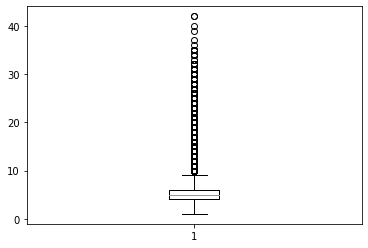

In [249]:
plt.boxplot(train['O2A'])
plt.show()

In [250]:
check = train.groupby('O2A').agg({'suborder_code':'count'}).reset_index().rename(columns={'suborder_code':'count'})
check['per'] = check['count']*100/check['count'].sum()
check

,O2A,count,per
0,1,7671,0.296546
1,2,80088,3.096046
2,3,230969,8.928812
3,4,425224,16.438333
4,5,632742,24.460575
5,6,585561,22.636649
6,7,329646,12.743473
7,8,157167,6.075771
8,9,69128,2.672354
9,10,31436,1.215255


In [251]:
train['date_time'] = train['order_created_time']
train['order_created_date'] = train['date_time'].dt.date
train['day_of_week'] = train['date_time'].dt.weekday
train['hour_of_day'] = train['date_time'].dt.hour
train['mon'] = np.where(train['day_of_week'] == 0, 1, 0)
train['tue'] = np.where(train['day_of_week'] == 1, 1, 0)
train['wed'] = np.where(train['day_of_week'] == 2, 1, 0)
train['thurs'] = np.where(train['day_of_week'] == 3, 1, 0)
train['fri'] = np.where(train['day_of_week'] == 4, 1, 0)
train['sat'] = np.where(train['day_of_week'] == 5, 1, 0)
train['sun'] = np.where(train['day_of_week'] == 6, 1, 0)
train['day_quarter'] = (train['hour_of_day'] // 6) + 1
train = train.drop(columns = ['day_of_week','order_created_time','date_time','hour_of_day'])
"""removing outliers..orders delivered after 25 days"""
train = train.loc[train['O2A'].between(1,15)]

In [252]:
train.head()

,suborder_code,courier_group,ds,dc,dp,os,oc,op,seller,O2S,...,PDD2,order_created_date,mon,tue,wed,thurs,fri,sat,sun,day_quarter
0,52437408388,EKART,TAMIL NADU,PALACODE,636808,DELHI,NEW DELHI,110036,s2c5cc,0,...,2022-05-09 00:12:47,2022-05-01,0,0,0,0,0,0,1,1
1,52437417472,EKART,UTTAR PRADESH,CHANDAUSI,244412,MAHARASHTRA,PALGHAR,401404,s21d01,1,...,2022-05-09 00:11:33,2022-05-01,0,0,0,0,0,0,1,1
2,52437424849,XPRESSBEES,MADHYA PRADESH,INDORE,452005,WEST BENGAL,DIAMOND HARBOUR,743368,s8752e,1,...,2022-05-09 00:08:02,2022-05-01,0,0,0,0,0,0,1,1
3,52437463963,EKART,TAMIL NADU,CUDDALORE,607001,UTTAR PRADESH,KANPUR,208012,sda588,0,...,2022-05-11 00:07:01,2022-05-01,0,0,0,0,0,0,1,1
4,52437492878,LAAP_SD,TAMIL NADU,CHENNAI,600002,GUJARAT,SURAT,394230,s946b5,0,...,2022-05-09 00:05:43,2022-05-01,0,0,0,0,0,0,1,1


In [253]:
## creating cg variables
cg_df = pd.DataFrame(train['courier_group'].value_counts().reset_index().rename(columns={'index':'cg','courier_group':'count'}))
cg_df


,cg,count
0,EKART,1418317
1,LAAP_SD,394597
2,XPRESSBEES,262220
3,BLUEDART,244204
4,DELHIVERY,127117
5,ECOMM_EXP,119044
6,SHADOWFAX,17746


In [254]:
cg_dummy = pd.get_dummies(train['courier_group'])
train = pd.concat([train, cg_dummy],axis=1)
train

,suborder_code,courier_group,ds,dc,dp,os,oc,op,seller,O2S,...,sat,sun,day_quarter,BLUEDART,DELHIVERY,ECOMM_EXP,EKART,LAAP_SD,SHADOWFAX,XPRESSBEES
0,52437408388,EKART,TAMIL NADU,PALACODE,636808,DELHI,NEW DELHI,110036,s2c5cc,0,...,0,1,1,0,0,0,1,0,0,0
1,52437417472,EKART,UTTAR PRADESH,CHANDAUSI,244412,MAHARASHTRA,PALGHAR,401404,s21d01,1,...,0,1,1,0,0,0,1,0,0,0
2,52437424849,XPRESSBEES,MADHYA PRADESH,INDORE,452005,WEST BENGAL,DIAMOND HARBOUR,743368,s8752e,1,...,0,1,1,0,0,0,0,0,0,1
3,52437463963,EKART,TAMIL NADU,CUDDALORE,607001,UTTAR PRADESH,KANPUR,208012,sda588,0,...,0,1,1,0,0,0,1,0,0,0
4,52437492878,LAAP_SD,TAMIL NADU,CHENNAI,600002,GUJARAT,SURAT,394230,s946b5,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586778,52781694763,DELHIVERY,TELANGANA,HYDERABAD,500013,DELHI,NEW DELHI,110092,sd9219,1,...,0,0,4,0,1,0,0,0,0,0
2586779,52781697869,EKART,MADHYA PRADESH,BARWANI,451551,DELHI,NEW DELHI,110092,s8879d,1,...,0,0,4,0,0,0,1,0,0,0
2586780,52781723324,EKART,JHARKHAND,BOKARO,827014,HARYANA,SONIPAT,131001,s6d50a,1,...,0,0,4,0,0,0,1,0,0,0
2586781,52781733621,BLUEDART,HARYANA,BAHADURGARH,124507,PUNJAB,MOHALI,140308,s68bb9,1,...,0,0,4,1,0,0,0,0,0,0


In [255]:
train['oc'] = 'oc_'+train['oc']
train['dc'] = 'dc_'+train['dc']
train['os'] = 'os_'+train['os']
train['ds'] = 'ds_'+train['ds']

In [256]:
oc_df = pd.DataFrame(train['oc'].value_counts().reset_index().rename(columns={'index':'origin_city','oc':'count'}))
oc_df

,origin_city,count
0,oc_NEW DELHI,674398
1,oc_SURAT,290217
2,oc_MUMBAI,141830
3,oc_JAIPUR,123263
4,oc_NOIDA,79804
...,...,...
293,oc_NARAINI,1
294,oc_KHUSHKHERA,1
295,oc_PINJORE,1
296,oc_ANUPGARH,1


In [257]:
## creating oc dummy
# oc_df = oc_df[oc_df['count']>10000]
oc_list = oc_df['origin_city'].values.tolist()
train['oc'] = np.where(~train['oc'].isin(oc_list),'oc_others',train['oc'])
oc_dummy = pd.get_dummies(train['oc'])
train = pd.concat([train, oc_dummy],axis=1)
train


,suborder_code,courier_group,ds,dc,dp,os,oc,op,seller,O2S,...,oc_VARANASI,oc_VASAI,oc_VELLORE,oc_VIJAYAWADA,oc_VIRAR,oc_VISHAKHAPATNAM,oc_VIZIANAGARAM,oc_WAYANAD,oc_YAMUNA NAGAR,oc_ZIRAKPUR
0,52437408388,EKART,ds_TAMIL NADU,dc_PALACODE,636808,os_DELHI,oc_NEW DELHI,110036,s2c5cc,0,...,0,0,0,0,0,0,0,0,0,0
1,52437417472,EKART,ds_UTTAR PRADESH,dc_CHANDAUSI,244412,os_MAHARASHTRA,oc_PALGHAR,401404,s21d01,1,...,0,0,0,0,0,0,0,0,0,0
2,52437424849,XPRESSBEES,ds_MADHYA PRADESH,dc_INDORE,452005,os_WEST BENGAL,oc_DIAMOND HARBOUR,743368,s8752e,1,...,0,0,0,0,0,0,0,0,0,0
3,52437463963,EKART,ds_TAMIL NADU,dc_CUDDALORE,607001,os_UTTAR PRADESH,oc_KANPUR,208012,sda588,0,...,0,0,0,0,0,0,0,0,0,0
4,52437492878,LAAP_SD,ds_TAMIL NADU,dc_CHENNAI,600002,os_GUJARAT,oc_SURAT,394230,s946b5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586778,52781694763,DELHIVERY,ds_TELANGANA,dc_HYDERABAD,500013,os_DELHI,oc_NEW DELHI,110092,sd9219,1,...,0,0,0,0,0,0,0,0,0,0
2586779,52781697869,EKART,ds_MADHYA PRADESH,dc_BARWANI,451551,os_DELHI,oc_NEW DELHI,110092,s8879d,1,...,0,0,0,0,0,0,0,0,0,0
2586780,52781723324,EKART,ds_JHARKHAND,dc_BOKARO,827014,os_HARYANA,oc_SONIPAT,131001,s6d50a,1,...,0,0,0,0,0,0,0,0,0,0
2586781,52781733621,BLUEDART,ds_HARYANA,dc_BAHADURGARH,124507,os_PUNJAB,oc_MOHALI,140308,s68bb9,1,...,0,0,0,0,0,0,0,0,0,0


In [258]:
dc_df = pd.DataFrame(train['dc'].value_counts().reset_index().rename(columns={'index':'dest_city','dc':'count'}))
dc_df

,dest_city,count
0,dc_NEW DELHI,86871
1,dc_HYDERABAD,72987
2,dc_BANGALORE,67230
3,dc_MUMBAI,47871
4,dc_CHENNAI,37898
...,...,...
3527,dc_BHOWALI,1
3528,dc_KHAMMAM_AP,1
3529,dc_DHARAPUR,1
3530,dc_CHANGANASSERY,1


In [259]:
# dc_df[dc_df['count']>5000]

In [260]:
## creating dc dummy
dc_df = dc_df[dc_df['count']>5000]
oc_list = dc_df['dest_city'].values.tolist()
train['dc'] = np.where(~train['dc'].isin(oc_list),'dc_others',train['dc'])
dc_dummy = pd.get_dummies(train['dc'])
train = pd.concat([train, dc_dummy],axis=1)
train


,suborder_code,courier_group,ds,dc,dp,os,oc,op,seller,O2S,...,dc_TRIVANDRUM,dc_UDAIPUR,dc_VADODARA,dc_VARANASI,dc_VELLORE,dc_VIJAYAWADA,dc_VISHAKHAPATNAM,dc_WARANGAL,dc_WEST GODAVARI,dc_others
0,52437408388,EKART,ds_TAMIL NADU,dc_others,636808,os_DELHI,oc_NEW DELHI,110036,s2c5cc,0,...,0,0,0,0,0,0,0,0,0,1
1,52437417472,EKART,ds_UTTAR PRADESH,dc_others,244412,os_MAHARASHTRA,oc_PALGHAR,401404,s21d01,1,...,0,0,0,0,0,0,0,0,0,1
2,52437424849,XPRESSBEES,ds_MADHYA PRADESH,dc_INDORE,452005,os_WEST BENGAL,oc_DIAMOND HARBOUR,743368,s8752e,1,...,0,0,0,0,0,0,0,0,0,0
3,52437463963,EKART,ds_TAMIL NADU,dc_others,607001,os_UTTAR PRADESH,oc_KANPUR,208012,sda588,0,...,0,0,0,0,0,0,0,0,0,1
4,52437492878,LAAP_SD,ds_TAMIL NADU,dc_CHENNAI,600002,os_GUJARAT,oc_SURAT,394230,s946b5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586778,52781694763,DELHIVERY,ds_TELANGANA,dc_HYDERABAD,500013,os_DELHI,oc_NEW DELHI,110092,sd9219,1,...,0,0,0,0,0,0,0,0,0,0
2586779,52781697869,EKART,ds_MADHYA PRADESH,dc_others,451551,os_DELHI,oc_NEW DELHI,110092,s8879d,1,...,0,0,0,0,0,0,0,0,0,1
2586780,52781723324,EKART,ds_JHARKHAND,dc_others,827014,os_HARYANA,oc_SONIPAT,131001,s6d50a,1,...,0,0,0,0,0,0,0,0,0,1
2586781,52781733621,BLUEDART,ds_HARYANA,dc_others,124507,os_PUNJAB,oc_MOHALI,140308,s68bb9,1,...,0,0,0,0,0,0,0,0,0,1


In [261]:
## creating os dummy
# os_df = pd.DataFrame(train['os'].value_counts().reset_index().rename(columns={'index':'origin_state','os':'count'}))
os_dummy = pd.get_dummies(train['os'])
train = pd.concat([train, os_dummy],axis=1)
train.head(5)


,suborder_code,courier_group,ds,dc,dp,os,oc,op,seller,O2S,...,os_MAHARASHTRA,os_ORISSA,os_PONDICHERRY,os_PUNJAB,os_RAJASTHAN,os_TAMIL NADU,os_TELANGANA,os_UTTAR PRADESH,os_UTTARAKHAND,os_WEST BENGAL
0,52437408388,EKART,ds_TAMIL NADU,dc_others,636808,os_DELHI,oc_NEW DELHI,110036,s2c5cc,0,...,0,0,0,0,0,0,0,0,0,0
1,52437417472,EKART,ds_UTTAR PRADESH,dc_others,244412,os_MAHARASHTRA,oc_PALGHAR,401404,s21d01,1,...,1,0,0,0,0,0,0,0,0,0
2,52437424849,XPRESSBEES,ds_MADHYA PRADESH,dc_INDORE,452005,os_WEST BENGAL,oc_DIAMOND HARBOUR,743368,s8752e,1,...,0,0,0,0,0,0,0,0,0,1
3,52437463963,EKART,ds_TAMIL NADU,dc_others,607001,os_UTTAR PRADESH,oc_KANPUR,208012,sda588,0,...,0,0,0,0,0,0,0,1,0,0
4,52437492878,LAAP_SD,ds_TAMIL NADU,dc_CHENNAI,600002,os_GUJARAT,oc_SURAT,394230,s946b5,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
## creating ds dummy
# ds_df = pd.DataFrame(train['ds'].value_counts().reset_index().rename(columns={'index':'dest_state','ds':'count'}))
ds_dummy = pd.get_dummies(train['ds'])
train = pd.concat([train, ds_dummy],axis=1)
train.head(5)


,suborder_code,courier_group,ds,dc,dp,os,oc,op,seller,O2S,...,ds_PONDICHERRY,ds_PUNJAB,ds_RAJASTHAN,ds_SIKKIM,ds_TAMIL NADU,ds_TELANGANA,ds_TRIPURA,ds_UTTAR PRADESH,ds_UTTARAKHAND,ds_WEST BENGAL
0,52437408388,EKART,ds_TAMIL NADU,dc_others,636808,os_DELHI,oc_NEW DELHI,110036,s2c5cc,0,...,0,0,0,0,1,0,0,0,0,0
1,52437417472,EKART,ds_UTTAR PRADESH,dc_others,244412,os_MAHARASHTRA,oc_PALGHAR,401404,s21d01,1,...,0,0,0,0,0,0,0,1,0,0
2,52437424849,XPRESSBEES,ds_MADHYA PRADESH,dc_INDORE,452005,os_WEST BENGAL,oc_DIAMOND HARBOUR,743368,s8752e,1,...,0,0,0,0,0,0,0,0,0,0
3,52437463963,EKART,ds_TAMIL NADU,dc_others,607001,os_UTTAR PRADESH,oc_KANPUR,208012,sda588,0,...,0,0,0,0,1,0,0,0,0,0
4,52437492878,LAAP_SD,ds_TAMIL NADU,dc_CHENNAI,600002,os_GUJARAT,oc_SURAT,394230,s946b5,0,...,0,0,0,0,1,0,0,0,0,0


In [263]:
non_dummy_features = ['cg_oc_dc_o2a_7',
                     'cg_oc_ds_o2a_7',
                     'oc_dc_o2a_7',
                     'oc_ds_o2a_7',
                     'cg_dc_o2a_7',
                     'cg_ds_o2a_7',
                     'dc_o2a_7',
                     'ds_o2a_7',
                     'os_ds_o2a_7',
                     'cg_os_ds_o2a_7',
                     'cg_oc_ds_breach_7',
                     'cg_oc_dc_breach_7',
                     'cg_dc_breach_7',
                     'cg_ds_breach_7',
                     'oc_ds_breach_7',
                     'oc_dc_breach_7',
                     'oc_dc_att_count_7',
                     'dc_att_count_7']

In [264]:
feature_list = non_dummy_features + cg_dummy.columns.tolist() + oc_dummy.columns.tolist() + dc_dummy.columns.tolist() + os_dummy.columns.tolist() + ds_dummy.columns.tolist()


In [265]:
feature_list = feature_list+['order_created_date']
feature_list

['cg_oc_dc_o2a_7',
 'cg_oc_ds_o2a_7',
 'oc_dc_o2a_7',
 'oc_ds_o2a_7',
 'cg_dc_o2a_7',
 'cg_ds_o2a_7',
 'dc_o2a_7',
 'ds_o2a_7',
 'os_ds_o2a_7',
 'cg_os_ds_o2a_7',
 'cg_oc_ds_breach_7',
 'cg_oc_dc_breach_7',
 'cg_dc_breach_7',
 'cg_ds_breach_7',
 'oc_ds_breach_7',
 'oc_dc_breach_7',
 'oc_dc_att_count_7',
 'dc_att_count_7',
 'BLUEDART',
 'DELHIVERY',
 'ECOMM_EXP',
 'EKART',
 'LAAP_SD',
 'SHADOWFAX',
 'XPRESSBEES',
 'oc_ADALAJ',
 'oc_ADIPUR',
 'oc_AGRA',
 'oc_AHMEDABAD',
 'oc_AJMER',
 'oc_AKBARPUR',
 'oc_AKLUJ',
 'oc_AKOLA',
 'oc_ALIBAG',
 'oc_ALIGARH',
 'oc_ALLAHABAD',
 'oc_ALWAR',
 'oc_AMBALA',
 'oc_AMBERNATH',
 'oc_AMRAOTI',
 'oc_AMRAVATI',
 'oc_AMRITSAR',
 'oc_ANAND',
 'oc_ANUPGARH',
 'oc_ARIYANKUPPAM',
 'oc_ATTIBELE',
 'oc_ATUL',
 'oc_AURANGABAD',
 'oc_AVINASHI',
 'oc_BADLAPUR',
 'oc_BAGHPAT',
 'oc_BAGRU',
 'oc_BAHADURGARH',
 'oc_BAHOUR',
 'oc_BALLY',
 'oc_BALOTRA',
 'oc_BANGALORE',
 'oc_BARABANKI',
 'oc_BARDHAMAN',
 'oc_BAREILLY',
 'oc_BARI BRAHMANA',
 'oc_BARODA',
 'oc_BAVLA',
 'oc

In [266]:
print('feature length : '+str(len(feature_list)))

feature length : 480


In [267]:
feature_list

['cg_oc_dc_o2a_7',
 'cg_oc_ds_o2a_7',
 'oc_dc_o2a_7',
 'oc_ds_o2a_7',
 'cg_dc_o2a_7',
 'cg_ds_o2a_7',
 'dc_o2a_7',
 'ds_o2a_7',
 'os_ds_o2a_7',
 'cg_os_ds_o2a_7',
 'cg_oc_ds_breach_7',
 'cg_oc_dc_breach_7',
 'cg_dc_breach_7',
 'cg_ds_breach_7',
 'oc_ds_breach_7',
 'oc_dc_breach_7',
 'oc_dc_att_count_7',
 'dc_att_count_7',
 'BLUEDART',
 'DELHIVERY',
 'ECOMM_EXP',
 'EKART',
 'LAAP_SD',
 'SHADOWFAX',
 'XPRESSBEES',
 'oc_ADALAJ',
 'oc_ADIPUR',
 'oc_AGRA',
 'oc_AHMEDABAD',
 'oc_AJMER',
 'oc_AKBARPUR',
 'oc_AKLUJ',
 'oc_AKOLA',
 'oc_ALIBAG',
 'oc_ALIGARH',
 'oc_ALLAHABAD',
 'oc_ALWAR',
 'oc_AMBALA',
 'oc_AMBERNATH',
 'oc_AMRAOTI',
 'oc_AMRAVATI',
 'oc_AMRITSAR',
 'oc_ANAND',
 'oc_ANUPGARH',
 'oc_ARIYANKUPPAM',
 'oc_ATTIBELE',
 'oc_ATUL',
 'oc_AURANGABAD',
 'oc_AVINASHI',
 'oc_BADLAPUR',
 'oc_BAGHPAT',
 'oc_BAGRU',
 'oc_BAHADURGARH',
 'oc_BAHOUR',
 'oc_BALLY',
 'oc_BALOTRA',
 'oc_BANGALORE',
 'oc_BARABANKI',
 'oc_BARDHAMAN',
 'oc_BAREILLY',
 'oc_BARI BRAHMANA',
 'oc_BARODA',
 'oc_BAVLA',
 'oc

In [268]:
## pre processing test data
test = pd.read_csv('pdd_data_june_2022.csv')
test['order_created_time'] = pd.to_datetime(test['order_created_time'],format='%Y-%m-%d %H:%M:%S')
test['date_time'] = test['order_created_time']
test['order_created_date'] = test['date_time'].dt.date
test['day_of_week'] = test['date_time'].dt.weekday
test['hour_of_day'] = test['date_time'].dt.hour
test['mon'] = np.where(test['day_of_week'] == 0, 1, 0)
test['tue'] = np.where(test['day_of_week'] == 1, 1, 0)
test['wed'] = np.where(test['day_of_week'] == 2, 1, 0)
test['thurs'] = np.where(test['day_of_week'] == 3, 1, 0)
test['fri'] = np.where(test['day_of_week'] == 4, 1, 0)
test['sat'] = np.where(test['day_of_week'] == 5, 1, 0)
test['sun'] = np.where(test['day_of_week'] == 6, 1, 0)
test['day_quarter'] = (test['hour_of_day'] // 6) + 1
test = test.drop(columns = ['day_of_week','date_time','hour_of_day'])
test['oc'] = 'oc_'+test['oc']
test['dc'] = 'dc_'+test['dc']
test['os'] = 'os_'+test['os']
test['ds'] = 'ds_'+test['ds']
test['courier_group'] = np.where(~test['courier_group'].isin(cg_dummy.columns.tolist()),'cg_others',test['courier_group'])
test['oc'] = np.where(~test['oc'].isin(oc_dummy.columns.tolist()),'oc_others',test['oc'])
test['dc'] = np.where(~test['dc'].isin(dc_dummy.columns.tolist()),'dc_others',test['dc'])
test['os'] = np.where(~test['os'].isin(os_dummy.columns.tolist()),'os_others',test['os'])
test['ds'] = np.where(~test['ds'].isin(ds_dummy.columns.tolist()),'ds_others',test['ds'])


In [269]:
## dummy encoding test data
test['courier_group'] = pd.Categorical(test['courier_group'],cg_dummy.columns.tolist())
test_cg_dummy = pd.get_dummies(test['courier_group'])
test = pd.concat([test,test_cg_dummy],axis=1)
test['oc'] = pd.Categorical(test['oc'],oc_dummy.columns.tolist())
test_oc_dummy = pd.get_dummies(test['oc'])
test = pd.concat([test,test_oc_dummy],axis=1)
test['dc'] = pd.Categorical(test['dc'],dc_dummy.columns.tolist())
test_dc_dummy = pd.get_dummies(test['dc'])
test = pd.concat([test,test_dc_dummy],axis=1)
test['os'] = pd.Categorical(test['os'],os_dummy.columns.tolist())
test_os_dummy = pd.get_dummies(test['os'])
test = pd.concat([test,test_os_dummy],axis=1)
test['ds'] = pd.Categorical(test['ds'],ds_dummy.columns.tolist())
test_ds_dummy = pd.get_dummies(test['ds'])
test = pd.concat([test,test_ds_dummy],axis=1)

In [270]:
out_of_time = pd.DataFrame(columns=['order_created_date','O2A','oc','dc','courier_group','day_quarter'])
out_of_time['order_created_date'] = list(test['order_created_date'])
out_of_time['O2A'] = list(test['O2A'])
out_of_time['oc'] = list(test['oc'])
out_of_time['dc'] = list(test['dc'])
out_of_time['courier_group'] = list(test['courier_group'])
out_of_time['day_quarter'] = list(test['day_quarter'])
out_of_time['os'] = list(test['os'])
out_of_time['ds'] = list(test['ds'])
out_of_time

,order_created_date,O2A,oc,dc,courier_group,day_quarter,os,ds
0,2022-06-01,3,oc_AHMEDABAD,dc_NEW DELHI,EKART,1,os_GUJARAT,ds_DELHI
1,2022-06-01,6,oc_NEW DELHI,dc_EAST GODAVARI,EKART,1,os_DELHI,ds_ANDHRA PRADESH
2,2022-06-01,4,oc_AGRA,dc_others,EKART,1,os_UTTAR PRADESH,ds_GUJARAT
3,2022-06-01,2,oc_LUDHIANA,dc_NEW DELHI,XPRESSBEES,1,os_PUNJAB,ds_DELHI
4,2022-06-01,1,oc_GURGAON,dc_NEW DELHI,EKART,1,os_HARYANA,ds_DELHI
...,...,...,...,...,...,...,...,...
1158943,2022-06-15,4,oc_GURGAON,dc_others,ECOMM_EXP,4,os_HARYANA,ds_GUJARAT
1158944,2022-06-15,6,oc_GHAZIABAD,dc_others,EKART,4,os_UTTAR PRADESH,ds_WEST BENGAL
1158945,2022-06-15,5,oc_NEW DELHI,dc_others,EKART,4,os_DELHI,ds_HARYANA
1158946,2022-06-15,4,oc_HISSAR,dc_others,XPRESSBEES,4,os_HARYANA,ds_PUNJAB


In [271]:
test.columns

Index(['suborder_code', 'courier_group', 'ds', 'dc', 'dp', 'os', 'oc', 'op',
       'seller', 'O2S',
       ...
       'ds_PONDICHERRY', 'ds_PUNJAB', 'ds_RAJASTHAN', 'ds_SIKKIM',
       'ds_TAMIL NADU', 'ds_TELANGANA', 'ds_TRIPURA', 'ds_UTTAR PRADESH',
       'ds_UTTARAKHAND', 'ds_WEST BENGAL'],
      dtype='object', length=508)

In [272]:
train = train[feature_list+['O2A']]
test = test[feature_list+['O2A']]

In [273]:
train = train.fillna(0)
test = test.fillna(0)

In [274]:
inputs = list(train.columns)
inputs.remove('O2A')
inputs

['cg_oc_dc_o2a_7',
 'cg_oc_ds_o2a_7',
 'oc_dc_o2a_7',
 'oc_ds_o2a_7',
 'cg_dc_o2a_7',
 'cg_ds_o2a_7',
 'dc_o2a_7',
 'ds_o2a_7',
 'os_ds_o2a_7',
 'cg_os_ds_o2a_7',
 'cg_oc_ds_breach_7',
 'cg_oc_dc_breach_7',
 'cg_dc_breach_7',
 'cg_ds_breach_7',
 'oc_ds_breach_7',
 'oc_dc_breach_7',
 'oc_dc_att_count_7',
 'dc_att_count_7',
 'BLUEDART',
 'DELHIVERY',
 'ECOMM_EXP',
 'EKART',
 'LAAP_SD',
 'SHADOWFAX',
 'XPRESSBEES',
 'oc_ADALAJ',
 'oc_ADIPUR',
 'oc_AGRA',
 'oc_AHMEDABAD',
 'oc_AJMER',
 'oc_AKBARPUR',
 'oc_AKLUJ',
 'oc_AKOLA',
 'oc_ALIBAG',
 'oc_ALIGARH',
 'oc_ALLAHABAD',
 'oc_ALWAR',
 'oc_AMBALA',
 'oc_AMBERNATH',
 'oc_AMRAOTI',
 'oc_AMRAVATI',
 'oc_AMRITSAR',
 'oc_ANAND',
 'oc_ANUPGARH',
 'oc_ARIYANKUPPAM',
 'oc_ATTIBELE',
 'oc_ATUL',
 'oc_AURANGABAD',
 'oc_AVINASHI',
 'oc_BADLAPUR',
 'oc_BAGHPAT',
 'oc_BAGRU',
 'oc_BAHADURGARH',
 'oc_BAHOUR',
 'oc_BALLY',
 'oc_BALOTRA',
 'oc_BANGALORE',
 'oc_BARABANKI',
 'oc_BARDHAMAN',
 'oc_BAREILLY',
 'oc_BARI BRAHMANA',
 'oc_BARODA',
 'oc_BAVLA',
 'oc

In [275]:
train.shape[0]

2583245

In [276]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [277]:
train = train.groupby(inputs).agg({'O2A':percentile(90)}).reset_index()
train

,cg_oc_dc_o2a_7,cg_oc_ds_o2a_7,oc_dc_o2a_7,oc_ds_o2a_7,cg_dc_o2a_7,cg_ds_o2a_7,dc_o2a_7,ds_o2a_7,os_ds_o2a_7,cg_os_ds_o2a_7,...,ds_RAJASTHAN,ds_SIKKIM,ds_TAMIL NADU,ds_TELANGANA,ds_TRIPURA,ds_UTTAR PRADESH,ds_UTTARAKHAND,ds_WEST BENGAL,order_created_date,O2A
0,0.0,0.00,0.00,0.00,0.00,0.00,5.10,5.15,0.00,0.00,...,0,0,0,0,0,0,0,0,2022-05-11,6.0
1,0.0,0.00,0.00,0.00,0.00,0.00,5.38,4.79,5.50,0.00,...,0,0,0,0,0,0,0,0,2022-05-01,7.0
2,0.0,0.00,0.00,0.00,0.00,0.00,18.64,18.48,16.91,0.00,...,0,0,0,0,0,0,0,0,2022-05-29,9.0
3,0.0,0.00,0.00,0.00,0.00,0.00,21.19,21.10,0.00,0.00,...,0,0,0,0,0,0,0,0,2022-05-27,11.0
4,0.0,0.00,0.00,0.00,0.00,4.00,4.78,4.54,5.57,0.00,...,0,0,0,0,0,0,0,0,2022-05-16,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066136,66.5,7.14,6.27,5.58,66.67,7.34,7.53,6.71,5.58,7.14,...,0,0,0,0,0,0,0,0,2022-05-04,8.2
1066137,66.5,7.20,6.21,5.61,66.67,7.39,7.50,6.75,5.61,7.20,...,0,0,0,0,0,0,0,0,2022-05-03,10.0
1066138,67.0,7.52,7.29,5.50,66.67,7.39,7.50,6.75,6.54,7.33,...,0,0,0,0,0,0,0,0,2022-05-03,8.4
1066139,67.0,7.65,7.71,5.48,66.67,7.34,7.53,6.71,6.48,7.30,...,0,0,0,0,0,0,0,0,2022-05-04,6.0


In [278]:
train['order_created_date'].max()

datetime.date(2022, 5, 31)

In [279]:
X_train = train[train['order_created_date']<datetime.datetime(2022,5,25).date()]
y_train = X_train['O2A']
X_train = X_train.loc[:,X_train.columns!='O2A']
X_val = train[train['order_created_date']>=datetime.datetime(2022,5,25).date()]
y_val = X_val['O2A']
X_val = X_val.loc[:,X_val.columns!='O2A']

In [280]:
X_train.shape[0]

855227

In [281]:
X_test = test.loc[:,test.columns!='O2A']
y_test = test['O2A']

In [282]:
out_of_time.shape[0]

1158948

In [283]:
X_train.drop('order_created_date',inplace=True,axis=1)
X_val.drop('order_created_date',inplace=True,axis=1)
X_test.drop('order_created_date',inplace=True,axis=1)

In [284]:
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [285]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [286]:
norm = np.array(X_train)
normalizer = layers.Normalization(input_shape=[X_train.shape[1],], axis=None)
normalizer.adapt(norm)

In [287]:
# mse = tf.keras.losses.MeanSquaredError()
# def custom_loss(y_true, y_pred):
#     penalty = 20
#     true = K.cast(y_true, K.floatx())
#     pred = K.cast(y_pred, K.floatx())
#     diff = true - pred
#     diff = tf.convert_to_tensor(diff,dtype=tf.float32)
#     loss = tf.where(condition=tf.greater(diff,0),
#                       x = mse(true, pred)*penalty,
#                       y = mse(true, pred))
#     loss = tf.where(condition=tf.greater(pred-true,2),
#                       x = loss*penalty/2,
#                       y = loss*0.5)
#     return loss

In [288]:
mse = tf.keras.losses.MeanSquaredError()
def custom_loss(y_true, y_pred):
    penalty = 20
    true = K.cast(y_true, K.floatx())
    pred = K.cast(y_pred, K.floatx())
    diff = true - pred
    diff = tf.convert_to_tensor(diff,dtype=tf.float32)
    loss = tf.where(condition=tf.greater(diff,0),
                      x = mse(true, pred)*penalty,
                      y = mse(true, pred))
    return loss

In [289]:
# def customLoss(true,pred):
#     true = K.cast(true, K.floatx())
#     pred = K.cast(pred, K.floatx())
#     diff = true - pred
#     greater = K.greater(diff,2)
#     greater = K.cast(greater, K.floatx())
#     greater = greater + 5
#     return K.mean(greater*K.square(diff))

In [290]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(1)
    ])

    model.compile(loss=custom_loss,
                optimizer=tf.keras.optimizers.Adam(0.001))
#     model.compile(loss=tf.keras.losses.mean_squared_error,
#                 optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [291]:
early_stopping = keras.callbacks.EarlyStopping(
                    min_delta=0.1,
                    monitor='loss', 
                    verbose=1,
                    patience=10,
                    mode='min',
                    restore_best_weights=True)

In [292]:
dnn_model = build_and_compile_model(normalizer)

In [293]:
dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 479)              3         
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 256)               122880    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                      

In [294]:
EPOCHS = 100
BATCH_SIZE = 2000

In [295]:
dnn_fitted_model = dnn_model.fit(X_train,
                                 y_train,
                                batch_size=BATCH_SIZE,
                                epochs=EPOCHS,
                                validation_data=(X_val, y_val),
                                callbacks=[early_stopping])

428/428 [==============================] - 37s 88ms/step - loss: 21.2266 - val_loss: 16.7535
Epoch 3/100
428/428 [==============================] - 42s 98ms/step - loss: 19.1928 - val_loss: 18.2519
Epoch 4/100
428/428 [==============================] - 41s 95ms/step - loss: 18.4781 - val_loss: 18.0290
Epoch 5/100
428/428 [==============================] - 39s 90ms/step - loss: 18.0937 - val_loss: 17.5782
Epoch 6/100
428/428 [==============================] - 40s 94ms/step - loss: 17.7696 - val_loss: 14.6500
Epoch 7/100
428/428 [==============================] - 37s 88ms/step - loss: 17.5373 - val_loss: 17.3209
Epoch 8/100
428/428 [==============================] - 39s 92ms/step - loss: 17.3181 - val_loss: 14.8558
Epoch 9/100
425/428 [============================>.] - ETA: 0s - loss: 17.1759

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



428/428 [==============================] - 40s 93ms/step - loss: 16.0303 - val_loss: 14.6946
Epoch 22/100
428/428 [==============================] - 38s 88ms/step - loss: 15.9512 - val_loss: 14.5204
Epoch 23/100
428/428 [==============================] - 40s 93ms/step - loss: 15.9150 - val_loss: 15.1161
Epoch 24/100
428/428 [==============================] - 37s 86ms/step - loss: 15.8769 - val_loss: 14.6289
Epoch 25/100
428/428 [==============================] - 35s 81ms/step - loss: 15.8527 - val_loss: 15.3223
Epoch 26/100
428/428 [==============================] - 36s 85ms/step - loss: 15.7972 - val_loss: 13.0226
Epoch 27/100
428/428 [==============================] - 35s 83ms/step - loss: 15.8008 - val_loss: 11.8613
Epoch 28/100
169/428 [==========>...................] - ETA: 20s - loss: 15.6960

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



428/428 [==============================] - 39s 90ms/step - loss: 15.3316 - val_loss: 12.9904
Epoch 42/100
428/428 [==============================] - 41s 95ms/step - loss: 15.3133 - val_loss: 14.2556
Epoch 43/100
428/428 [==============================] - 38s 90ms/step - loss: 15.2786 - val_loss: 12.8838
Epoch 44/100
428/428 [==============================] - 41s 95ms/step - loss: 15.3129 - val_loss: 13.0163
Epoch 45/100
428/428 [==============================] - 40s 93ms/step - loss: 15.2331 - val_loss: 11.6363
Epoch 46/100
428/428 [==============================] - 39s 92ms/step - loss: 15.2188 - val_loss: 13.2042
Epoch 47/100
428/428 [==============================] - 36s 84ms/step - loss: 15.2302 - val_loss: 13.8087
Epoch 48/100
143/428 [=========>....................] - ETA: 21s - loss: 15.1372

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



428/428 [==============================] - 41s 97ms/step - loss: 14.9841 - val_loss: 13.0668
Epoch 60/100
428/428 [==============================] - 39s 90ms/step - loss: 15.0227 - val_loss: 12.7992
Epoch 61/100
428/428 [==============================] - 37s 86ms/step - loss: 14.9492 - val_loss: 13.3282
Epoch 62/100
428/428 [==============================] - 39s 91ms/step - loss: 14.9514 - val_loss: 14.5009
Epoch 63/100
428/428 [==============================] - 40s 93ms/step - loss: 14.9496 - val_loss: 13.3653
Epoch 64/100
428/428 [==============================] - 39s 91ms/step - loss: 14.9488 - val_loss: 13.5958
Epoch 65/100
428/428 [==============================] - 40s 93ms/step - loss: 14.9096 - val_loss: 15.0173
Epoch 66/100
428/428 [==============================] - 40s 94ms/step - loss: 14.9099 - val_loss: 13.1784
Epoch 67/100
  4/428 [..............................] - ETA: 32s - loss: 13.9034

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



428/428 [==============================] - 38s 90ms/step - loss: 14.7649 - val_loss: 13.8948
Epoch 79/100
428/428 [==============================] - 37s 87ms/step - loss: 14.7250 - val_loss: 12.9685
Epoch 80/100
428/428 [==============================] - 38s 88ms/step - loss: 14.7392 - val_loss: 13.0268
Epoch 81/100
428/428 [==============================] - 37s 86ms/step - loss: 14.7422 - val_loss: 12.2023
Epoch 82/100
428/428 [==============================] - 36s 85ms/step - loss: 14.6971 - val_loss: 14.7446
Epoch 83/100
428/428 [==============================] - 36s 83ms/step - loss: 14.7263 - val_loss: 12.2729
Epoch 84/100
428/428 [==============================] - 38s 88ms/step - loss: 14.6670 - val_loss: 14.4417
Epoch 85/100
290/428 [===================>..........] - ETA: 10s - loss: 14.6777

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [296]:
# save model for inference
dnn_model.save('saved_model/my_model_23')

INFO:tensorflow:Assets written to: saved_model/my_model_23/assets


In [531]:
## load model for inference
dnn_model = tf.keras.models.load_model('saved_model/my_model_23',compile=False)
dnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 482)              3         
 ion)                                                            
                                                                 
 dense_27 (Dense)            (None, 256)               123648    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               65792     
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 1)                 257       
                                                      

In [297]:
pred = dnn_model.predict(X_test,batch_size=BATCH_SIZE).flatten()

580/580 [==============================] - 5s 7ms/step


In [298]:
from sklearn.metrics import mean_absolute_percentage_error
print("mape : "+str(mean_absolute_percentage_error(list(y_test),list(pred))))

mape : 139923581239.04163


In [315]:
predictions = pd.DataFrame(columns=['actual','predicted'])
predictions['actual'] = list(y_test)
predictions['predicted'] = list(pred)
predictions['predicted'] = np.round(predictions['predicted']).astype(int)
predictions['predicted'] = predictions['predicted']+1
predictions = predictions.rename(columns={'predicted':'pdd2'})
predictions['pdd1'] = np.where(predictions['pdd2'] >= 4, predictions['pdd2'] - 2, 1)
predictions.loc[predictions['pdd2'] < 3, 'pdd2'] = 3
predictions['breach'] = np.where(predictions['actual']<predictions['pdd1'],'negative',
                                 np.where(predictions['actual']>predictions['pdd2'],'positive','ontime'))
predictions

,actual,pdd2,pdd1,breach
0,3,6,4,negative
1,6,8,6,ontime
2,4,7,5,negative
3,2,5,3,negative
4,1,4,2,negative
...,...,...,...,...
1158943,4,6,4,ontime
1158944,6,7,5,ontime
1158945,5,5,3,ontime
1158946,4,5,3,ontime


In [316]:
out_of_time['pdd1'] = list(predictions['pdd1'])
out_of_time['pdd2'] = list(predictions['pdd2'])
out_of_time['breach'] = list(predictions['breach'])

In [317]:
## order date wise performance
results = pd.DataFrame(columns=['order_created_date','ontime','positive_breach','negative_breach','avg_pdd1',
                               'avg_pdd2'])
for date in out_of_time['order_created_date'].unique():
    p = out_of_time[out_of_time['order_created_date']==date]
    results = results.append({'order_created_date':date,
                              'ontime':p[p['breach']=='ontime'].shape[0]*100/p.shape[0],
                              'positive_breach':p[p['breach']=='positive'].shape[0]*100/p.shape[0],
                              'negative_breach':p[p['breach']=='negative'].shape[0]*100/p.shape[0],
                              'avg_pdd1':p['pdd1'].mean(),
                              'avg_pdd2':p['pdd2'].mean()},ignore_index=True)
    results['order_created_date'] = pd.to_datetime(results['order_created_date']).dt.date
    results = results.sort_values(by='order_created_date',ascending=True)
results


,order_created_date,ontime,positive_breach,negative_breach,avg_pdd1,avg_pdd2
0,2022-06-01,86.269499,6.503096,7.227405,4.603402,6.603402
1,2022-06-02,86.039808,6.388562,7.571629,4.606046,6.606046
2,2022-06-03,84.542739,7.998770,7.458491,4.575573,6.575573
3,2022-06-04,80.574322,13.726974,5.698703,4.547398,6.547398
4,2022-06-05,86.464540,8.670709,4.864751,4.555223,6.555223
5,2022-06-06,86.264485,8.007546,5.727969,4.549008,6.549008
6,2022-06-07,87.454663,6.805424,5.739913,4.533974,6.533974
7,2022-06-08,88.453847,6.649265,4.896888,4.513074,6.513074
8,2022-06-09,87.336968,6.727923,5.935109,4.492028,6.492028
9,2022-06-10,84.719682,9.372374,5.907945,4.474601,6.474601


In [305]:
results['order_created_date'] = pd.to_datetime(results['order_created_date'],format='%Y-%m-%d')
results['day_of_week'] = results['order_created_date'].dt.weekday
results['day_of_week'] = results['day_of_week'].apply(lambda x: calendar.day_name[x])
results

,order_created_date,ontime,positive_breach,negative_breach,avg_pdd1,avg_pdd2,day_of_week
0,2022-06-01,75.456612,4.372501,20.170887,5.114619,7.114619,Wednesday
1,2022-06-02,76.031778,4.322138,19.646084,5.114908,7.114908,Thursday
2,2022-06-03,74.901168,5.294079,19.804753,5.081327,7.081327,Friday
3,2022-06-04,78.008793,8.137348,13.853859,5.054650,7.054650,Saturday
4,2022-06-05,80.071711,4.993409,14.934880,5.064645,7.064645,Sunday
5,2022-06-06,78.810645,4.583715,16.605640,5.059579,7.059579,Monday
6,2022-06-07,79.801947,4.280103,15.917950,5.040092,7.040092,Tuesday
7,2022-06-08,80.487246,3.996275,15.516478,5.033857,7.033857,Wednesday
8,2022-06-09,78.256983,4.226384,17.516633,5.016545,7.016545,Thursday
9,2022-06-10,78.063974,5.984575,15.951451,4.987925,6.987925,Friday


In [779]:
out_of_time['promise_date'] = pd.to_datetime(out_of_time['order_created_date'])+pd.to_timedelta(out_of_time['pdd1'],unit='D')
out_of_time['promise_date'] = out_of_time['promise_date'].dt.date
out_of_time['delivered_date'] = pd.to_datetime(out_of_time['order_created_date'])+pd.to_timedelta(out_of_time['O2A'],unit='D')
out_of_time['delivered_date'] = out_of_time['delivered_date'].dt.date


In [781]:
## promise date wise performance
results = pd.DataFrame(columns=['promise_date','ontime','positive_breach','negative_breach','avg_pdd1',
                               'avg_pdd2'])
for date in out_of_time['promise_date'].unique():
    p = out_of_time[out_of_time['promise_date']==date]
    results = results.append({'promise_date':date,
                              'ontime':p[p['breach']=='ontime'].shape[0]*100/p.shape[0],
                              'positive_breach':p[p['breach']=='positive'].shape[0]*100/p.shape[0],
                              'negative_breach':p[p['breach']=='negative'].shape[0]*100/p.shape[0],
                              'avg_pdd1':p['pdd1'].mean(),
                              'avg_pdd2':p['pdd2'].mean()},ignore_index=True)
    results['promise_date'] = pd.to_datetime(results['promise_date']).dt.date
    results = results.sort_values(by='promise_date',ascending=True)
results = results[(results['promise_date']>=datetime.datetime(2022,6,10).date()) & (results['promise_date']<=datetime.datetime(2022,6,15).date())]
results


,promise_date,ontime,positive_breach,negative_breach,avg_pdd1,avg_pdd2
7,2022-06-10,79.364808,7.154171,13.481021,5.072317,7.072317
8,2022-06-11,80.507260,4.918561,14.574178,5.143712,7.143712
9,2022-06-12,80.854116,4.400869,14.745015,5.159492,7.159492
10,2022-06-13,83.617304,4.307778,12.074918,5.026920,7.026920
11,2022-06-14,81.623592,4.426234,13.950174,4.930551,6.930551
12,2022-06-15,80.950057,5.079129,13.970815,4.908720,6.908720


In [707]:
## delivery date wise performance
results = pd.DataFrame(columns=['delivered_date','ontime','positive_breach','negative_breach','avg_pdd1',
                               'avg_pdd2'])
for date in out_of_time['delivered_date'].unique():
    p = out_of_time[out_of_time['delivered_date']==date]
    results = results.append({'delivered_date':date,
                              'ontime':p[p['breach']=='ontime'].shape[0]*100/p.shape[0],
                              'positive_breach':p[p['breach']=='positive'].shape[0]*100/p.shape[0],
                              'negative_breach':p[p['breach']=='negative'].shape[0]*100/p.shape[0],
                              'avg_pdd1':p['pdd1'].mean(),
                              'avg_pdd2':p['pdd2'].mean()},ignore_index=True)
    results['delivered_date'] = pd.to_datetime(results['delivered_date']).dt.date
    results = results.sort_values(by='delivered_date',ascending=True)
results = results[(results['delivered_date']>=datetime.datetime(2022,6,11).date()) & (results['delivered_date']<=datetime.datetime(2022,6,15).date())]
results


,delivered_date,ontime,positive_breach,negative_breach,avg_pdd1,avg_pdd2
9,2022-06-11,84.439795,4.260349,11.299856,5.003724,7.003724
10,2022-06-12,83.163377,5.795237,11.041386,4.994682,6.994682
11,2022-06-13,82.293161,7.696435,10.010404,5.079144,7.079144
12,2022-06-14,81.364871,5.908024,12.727105,4.971337,6.971337
13,2022-06-15,81.711049,4.979713,13.309238,4.902248,6.902248


In [307]:
## origin state wise performance
os_df = pd.DataFrame(columns=['os','ontime','positive_breach','negative_breach'])
for os in out_of_time['os'].unique():
    p = out_of_time[out_of_time['os']==os]
    if p.shape[0]>0:
        os_df = os_df.append({'os':os,
                                  'ontime':p[p['breach']=='ontime'].shape[0]*100/p.shape[0],
                                  'positive_breach':p[p['breach']=='positive'].shape[0]*100/p.shape[0],
                                  'negative_breach':p[p['breach']=='negative'].shape[0]*100/p.shape[0]},ignore_index=True)
os_df


,os,ontime,positive_breach,negative_breach
0,os_MAHARASHTRA,76.477259,4.868644,18.654096
1,os_GUJARAT,77.758039,5.678967,16.562994
2,os_TAMIL NADU,73.944208,4.891927,21.163865
3,os_DELHI,78.908911,4.448640,16.642449
4,os_RAJASTHAN,79.752925,3.704449,16.542626
5,os_HARYANA,76.779127,4.304447,18.916426
6,os_UTTAR PRADESH,75.008031,6.181234,18.810735
7,os_KARNATAKA,72.766555,4.424419,22.809026
8,os_PUNJAB,73.378791,5.576351,21.044858
9,os_WEST BENGAL,75.228970,5.889813,18.881217


In [308]:
os_df[os_df['positive_breach']>10]

,os,ontime,positive_breach,negative_breach
10,os_BIHAR,55.566600,12.922465,31.510934
15,os_CHHATTISGARH,54.119974,10.942650,34.937376
19,os_ASSAM,66.956522,23.188406,9.855072
20,os_ORISSA,57.286432,18.090452,24.623116
21,os_DADRA AND NAGAR HAVELI,70.000000,10.769231,19.230769
23,os_PONDICHERRY,43.119266,34.862385,22.018349
24,os_ANDHRA PRADESH,44.754316,30.810093,24.435591
25,os_GOA,53.333333,24.444444,22.222222


In [309]:
## dest state wise performance
ds_df = pd.DataFrame(columns=['ds','ontime','positive_breach','negative_breach'])
for ds in out_of_time['ds'].unique():
    p = out_of_time[out_of_time['ds']==ds]
    if p.shape[0]>0:
        ds_df = ds_df.append({'ds':ds,
                                  'ontime':p[p['breach']=='ontime'].shape[0]*100/p.shape[0],
                                  'positive_breach':p[p['breach']=='positive'].shape[0]*100/p.shape[0],
                                  'negative_breach':p[p['breach']=='negative'].shape[0]*100/p.shape[0]},ignore_index=True)
ds_df


,ds,ontime,positive_breach,negative_breach
0,ds_MAHARASHTRA,76.023639,3.902261,20.074100
1,ds_UTTAR PRADESH,74.581877,4.116379,21.301745
2,ds_DELHI,81.445495,3.055180,15.499325
3,ds_BIHAR,70.859975,12.192178,16.947847
4,ds_TRIPURA,45.419959,26.704712,27.875329
5,ds_GUJARAT,79.278852,2.783379,17.937769
6,ds_SIKKIM,76.621005,4.908676,18.470320
7,ds_RAJASTHAN,71.885989,4.809392,23.304620
8,ds_ORISSA,80.189816,3.799254,16.010931
9,ds_TELANGANA,71.982643,8.799089,19.218268


In [310]:
ds_df[ds_df['positive_breach']>10]

,ds,ontime,positive_breach,negative_breach
3,ds_BIHAR,70.859975,12.192178,16.947847
4,ds_TRIPURA,45.419959,26.704712,27.875329
11,ds_JAMMU & KASHMIR,70.670288,10.944176,18.385536
31,ds_MIZORAM,56.892333,20.554649,22.553018
34,ds_ANDAMAN & NICOBAR ISLANDS,21.951220,26.016260,52.032520


In [311]:
## origin city wise performance
oc_df = pd.DataFrame(columns=['oc','ontime','positive_breach','negative_breach'])
for oc in out_of_time['oc'].unique():
    p = out_of_time[out_of_time['oc']==oc]
    if p.shape[0]>0:
        oc_df = oc_df.append({'oc':oc,
                                  'ontime':p[p['breach']=='ontime'].shape[0]*100/p.shape[0],
                                  'positive_breach':p[p['breach']=='positive'].shape[0]*100/p.shape[0],
                                  'negative_breach':p[p['breach']=='negative'].shape[0]*100/p.shape[0]},ignore_index=True)
oc_df


,oc,ontime,positive_breach,negative_breach
0,oc_MUMBAI,77.662990,4.818187,17.518823
1,oc_SURAT,78.288708,5.700669,16.010623
2,oc_TIRUPPUR,77.129620,4.633042,18.237338
3,oc_NEW DELHI,78.908911,4.448640,16.642449
4,oc_AHMEDABAD,76.471716,5.997124,17.531160
...,...,...,...,...
276,oc_SALEM,80.000000,0.000000,20.000000
277,oc_SAMASTIPUR,30.000000,40.000000,30.000000
278,oc_AKLUJ,100.000000,0.000000,0.000000
279,oc_BADLAPUR,100.000000,0.000000,0.000000


In [312]:
oc_df[oc_df['positive_breach']>10].sort_values(by='positive_breach',ascending=False).reset_index(drop=True)

,oc,ontime,positive_breach,negative_breach
0,oc_BHADOHI,0.000000,100.000000,0.000000
1,oc_SIDHPUR,25.000000,75.000000,0.000000
2,oc_SATNA,16.666667,66.666667,16.666667
3,oc_SIVAKASI,33.333333,66.666667,0.000000
4,oc_SILCHAR,27.586207,62.068966,10.344828
...,...,...,...,...
91,oc_RAMPUR,61.538462,10.769231,27.692308
92,oc_MADURAI,64.179104,10.447761,25.373134
93,oc_MEDCHAL,52.597403,10.389610,37.012987
94,oc_GURDASPUR,71.941122,10.303588,17.755290


In [313]:
## dest city wise performance
dc_df = pd.DataFrame(columns=['dc','ontime','positive_breach','negative_breach'])
for dc in out_of_time['dc'].unique():
    p = out_of_time[out_of_time['dc']==dc]
    if p.shape[0]>0:
        dc_df = dc_df.append({'dc':dc,
                                  'ontime':p[p['breach']=='ontime'].shape[0]*100/p.shape[0],
                                  'positive_breach':p[p['breach']=='positive'].shape[0]*100/p.shape[0],
                                  'negative_breach':p[p['breach']=='negative'].shape[0]*100/p.shape[0]},ignore_index=True)
dc_df


,dc,ontime,positive_breach,negative_breach
0,dc_others,76.853748,5.479107,17.667145
1,dc_LUCKNOW,79.560205,4.775743,15.664051
2,dc_NEW DELHI,81.445495,3.055180,15.499325
3,dc_AGARTALA,48.217578,26.275353,25.507068
4,dc_KANPUR,75.454222,4.845030,19.700748
...,...,...,...,...
90,dc_NAGPUR,65.221643,3.422425,31.355932
91,dc_VADODARA,81.384564,1.854919,16.760517
92,dc_ALAPPUZHA,85.593985,2.225564,12.180451
93,dc_SALEM,82.763533,2.457265,14.779202


In [314]:
dc_df[dc_df['positive_breach']>10].sort_values(by='positive_breach',ascending=False).reset_index(drop=True)

,dc,ontime,positive_breach,negative_breach
0,dc_AGARTALA,48.217578,26.275353,25.507068
1,dc_NELLORE,61.114160,13.666301,25.219539
2,dc_KARIMNAGAR_TG,71.639829,12.224778,16.135393
3,dc_PRAKASAM,66.988660,11.507770,21.503570
4,dc_SRINAGAR,71.481610,11.172990,17.345400


In [315]:
## courier group wise performance
cg_df = pd.DataFrame(columns=['cg','ontime','positive_breach','negative_breach'])
for cg in out_of_time['courier_group'].unique():
    p = out_of_time[out_of_time['courier_group']==cg]
    if p.shape[0]>0:
        cg_df = cg_df.append({'cg':cg,
                                  'ontime':p[p['breach']=='ontime'].shape[0]*100/p.shape[0],
                                  'positive_breach':p[p['breach']=='positive'].shape[0]*100/p.shape[0],
                                  'negative_breach':p[p['breach']=='negative'].shape[0]*100/p.shape[0]},ignore_index=True)
cg_df

,cg,ontime,positive_breach,negative_breach
0,DELHIVERY,62.947077,10.025668,27.027255
1,LAAP_SD,77.195374,5.073263,17.731364
2,EKART,80.717637,4.213218,15.069145
3,BLUEDART,68.255393,5.732955,26.011652
4,ECOMM_EXP,65.891366,5.493255,28.615380
5,XPRESSBEES,70.020173,7.021606,22.958221


In [316]:
## quarter wise
daytime_df = pd.DataFrame(columns=['day_quarter','ontime','positive_breach','negative_breach'])
for dq in out_of_time['day_quarter'].unique():
    p = out_of_time[out_of_time['day_quarter']==dq]
    if p.shape[0]>0:
        daytime_df = daytime_df.append({'day_quarter':dq,
                                  'ontime':p[p['breach']=='ontime'].shape[0]*100/p.shape[0],
                                  'positive_breach':p[p['breach']=='positive'].shape[0]*100/p.shape[0],
                                  'negative_breach':p[p['breach']=='negative'].shape[0]*100/p.shape[0]},ignore_index=True)
daytime_df


,day_quarter,ontime,positive_breach,negative_breach
0,1.0,41.589145,2.997367,55.413488
1,2.0,72.865354,4.688902,22.445744
2,3.0,81.395176,5.032699,13.572124
3,4.0,81.549568,5.821433,12.628998


In [317]:
# lanes = out_of_time[['oc','dc','courier_group']].drop_duplicates()
# lane_df = pd.DataFrame(columns=['lane','ontime','positive_breach','negative_breach'])
# for lane in lane_df['lane'].unique():
#     p = out_of_time[out_of_time['day_quarter']==dq]
#     if p.shape[0]>0:
#         lane_df = lane_df.append({'day_quarter':dq,
#                                   'ontime':p[p['breach']=='ontime'].shape[0]*100/p.shape[0],
#                                   'positive_breach':p[p['breach']=='positive'].shape[0]*100/p.shape[0],
#                                   'negative_breach':p[p['breach']=='negative'].shape[0]*100/p.shape[0]},ignore_index=True)
# lane_df
